
## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right|, $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right|, $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right|. $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

<IPython.core.display.Javascript object>


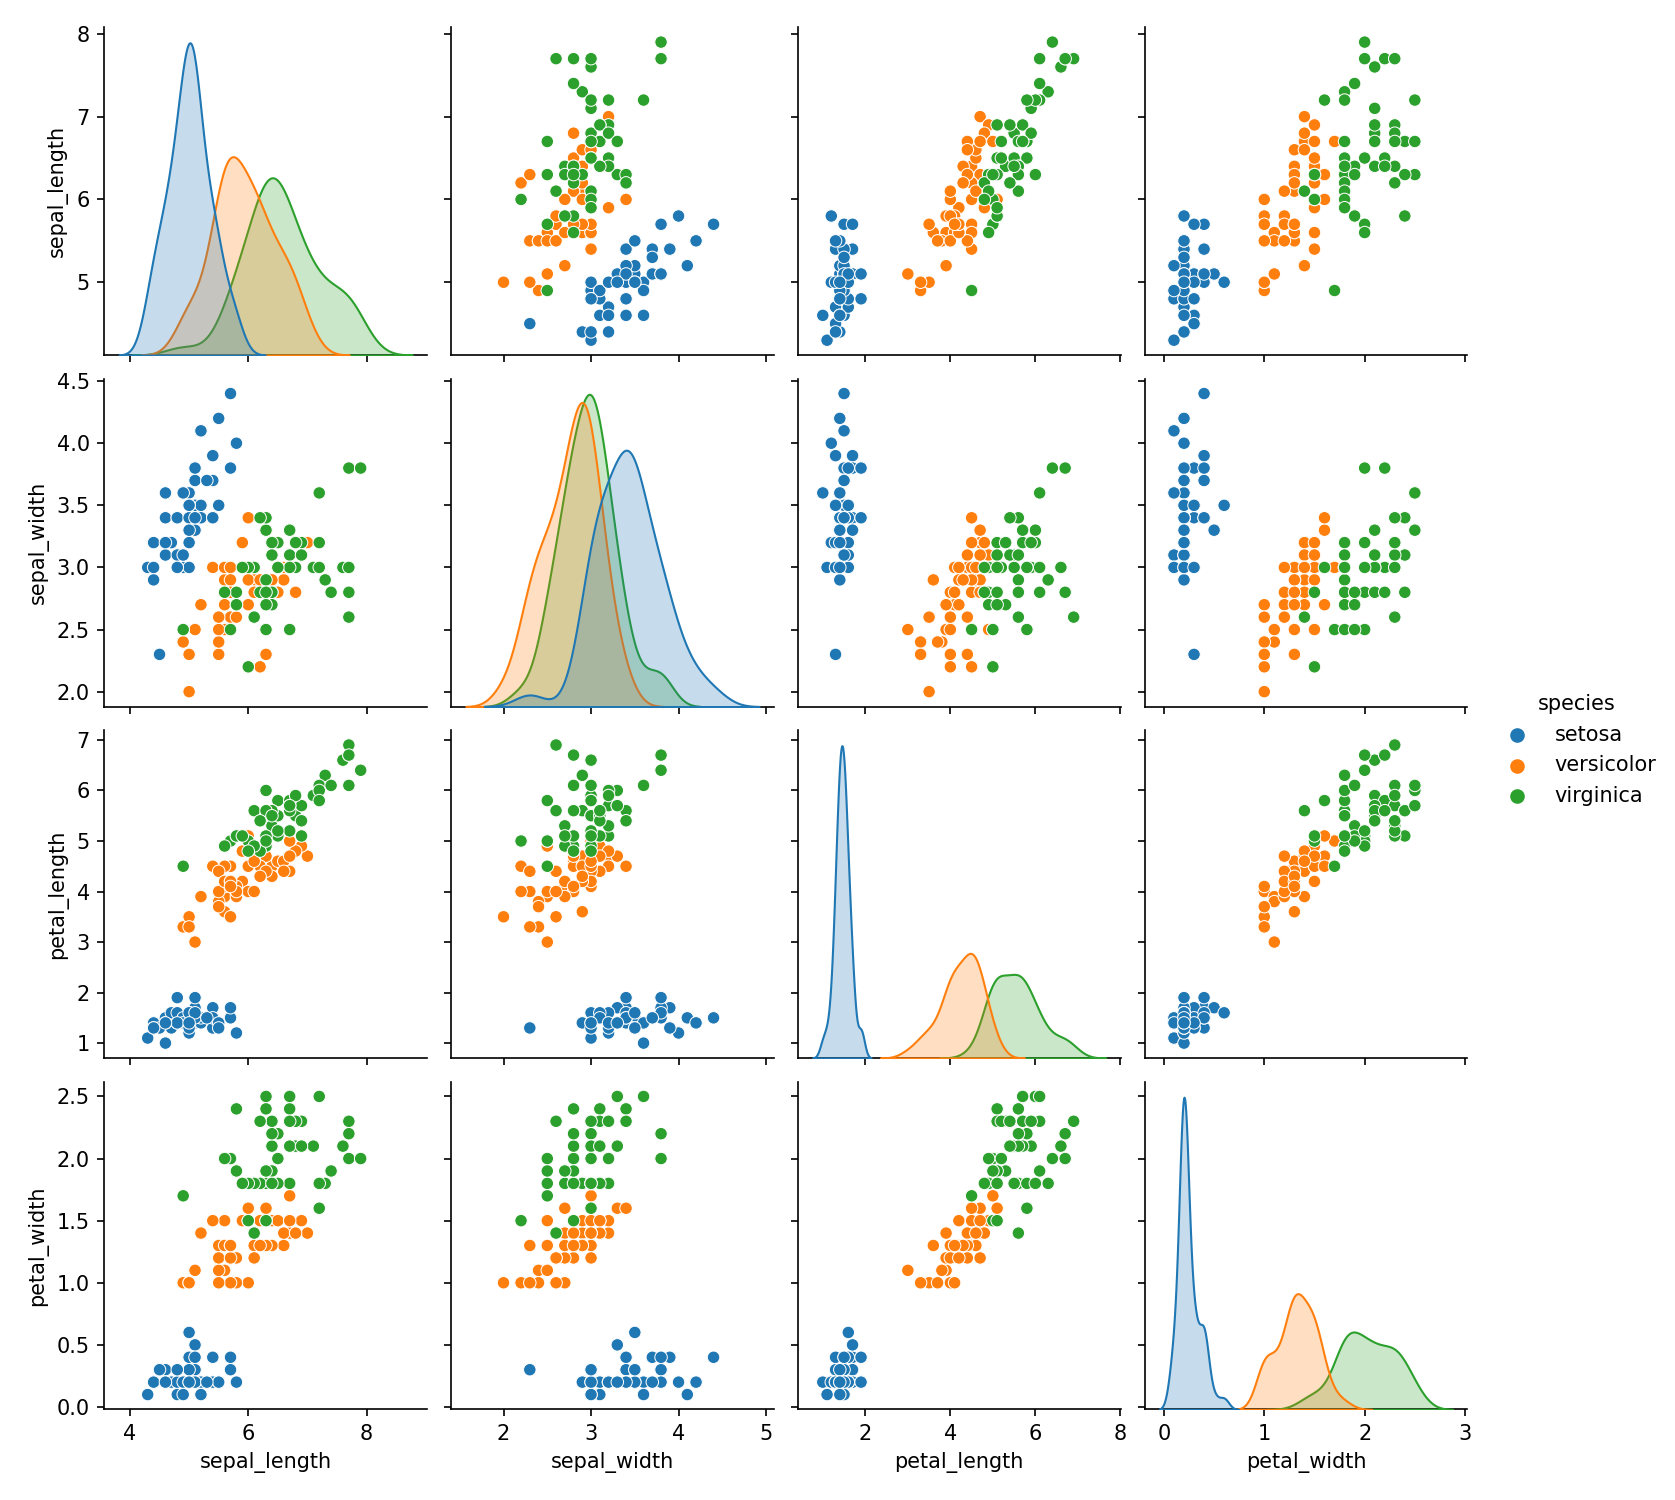

In [6]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()

<IPython.core.display.Javascript object>


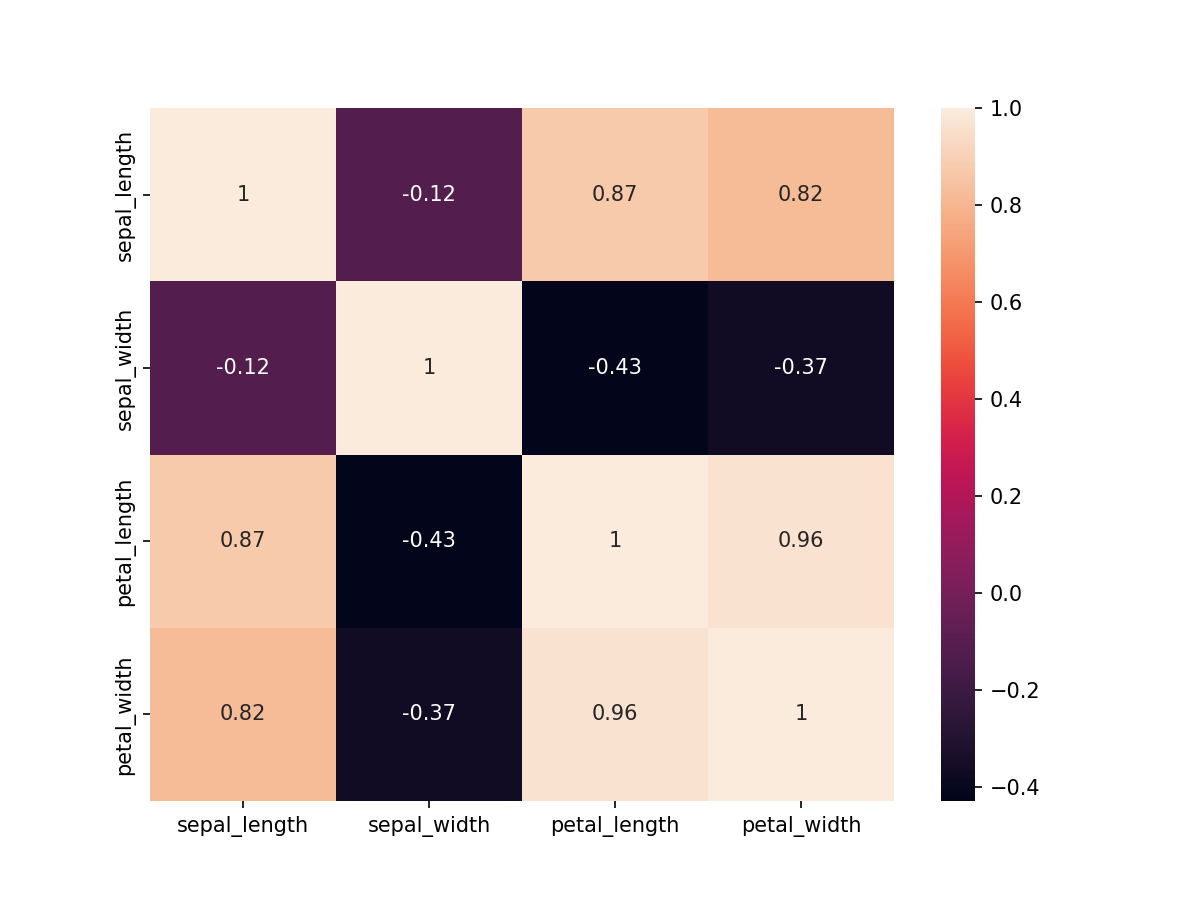

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(),annot = iris.corr())
plt.show()

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

* Atrybuty najbardziej ze sobą skorelowane dodatnio to petal_length i petal_width z wartością 0.96 oraz petal_length oraz sepal_length z wartością 0.87

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [11]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [12]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [13]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [14]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

<IPython.core.display.Javascript object>


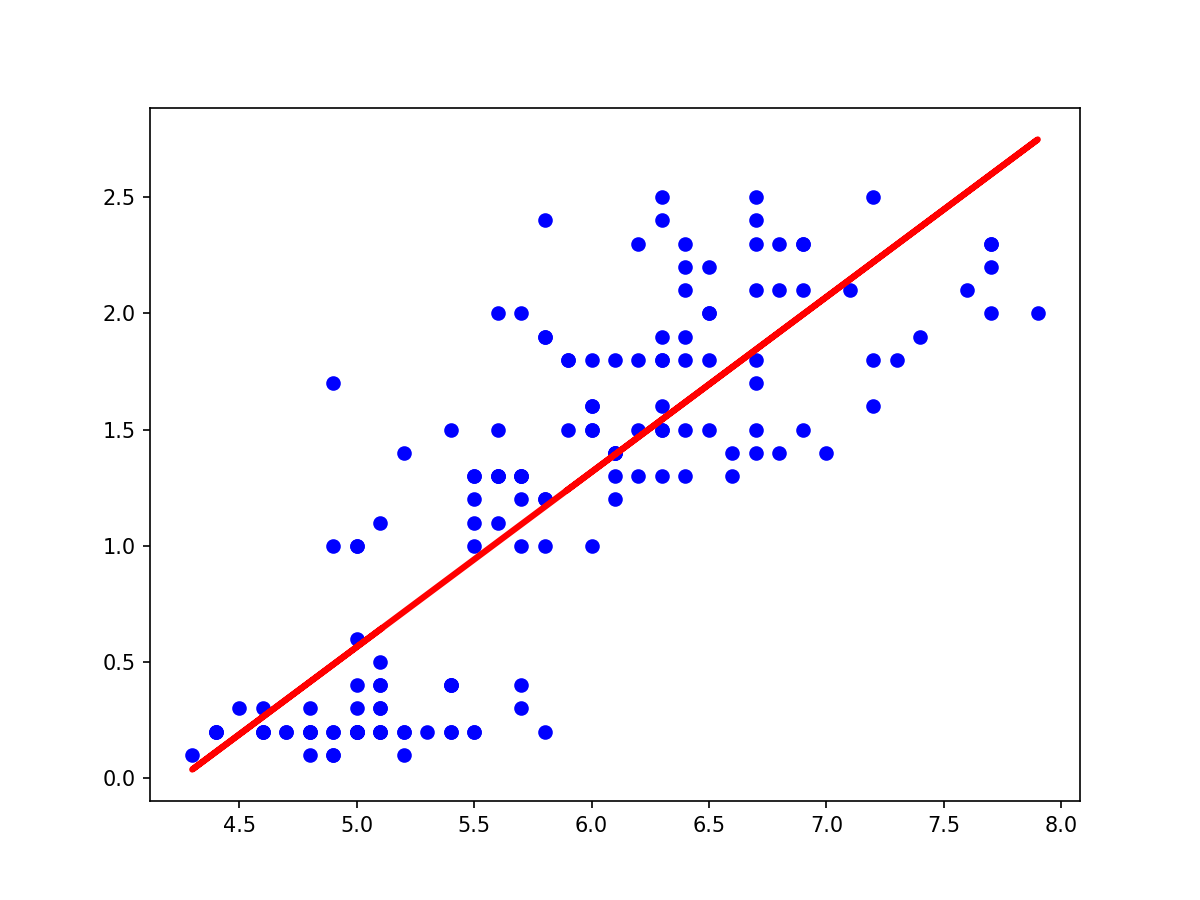

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [17]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość błędu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [25]:
def function1(df, n1, n2):
    x = df.iloc[:,n1].values.reshape(-1,1)
    y = df.iloc[:,n2].values.reshape(-1,1)

    regressor = LinearRegression()  
    regressor.fit(x,y) 
    w0 = regressor.intercept_
    w1 = regressor.coef_
    
    y_pred = regressor.predict(x)
    e = metrics.mean_squared_error(y, y_pred)
    return w0[0], w1[0][0], e

In [24]:
function1(iris, 0, 3)

(-3.2002150046491913, array([0.75291757]), 0.19101500769427363)

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (obciążenie / bias) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?

In [36]:
from itertools import combinations

col_index = [0, 1, 2, 3]

for idx_0, idx_1 in list(combinations(col_index, 2)):
    w0, w1, e = function1(iris, idx_0, idx_1)
    c = iris.corr().iloc[idx_0, idx_1]
    print(f'Columns: {idx_0} and {idx_1}')
    print(f'Error {e} | Corr {c}')

Columns: 0 and 1
Error 0.1861043758938136 | Corr -0.11756978413300088
Columns: 0 and 2
Error 0.7430610341321241 | Corr 0.8717537758865838
Columns: 0 and 3
Error 0.19101500769427363 | Corr 0.8179411262715758
Columns: 1 and 2
Error 2.5272893400281986 | Corr -0.42844010433053864
Columns: 1 and 3
Error 0.49976926485227013 | Corr -0.3661259325364377
Columns: 2 and 3
Error 0.04206730919499318 | Corr 0.962865431402796


Można zauważyć że im mniejszy błąd tym współczynniki są bardziej skorelowane

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

<IPython.core.display.Javascript object>


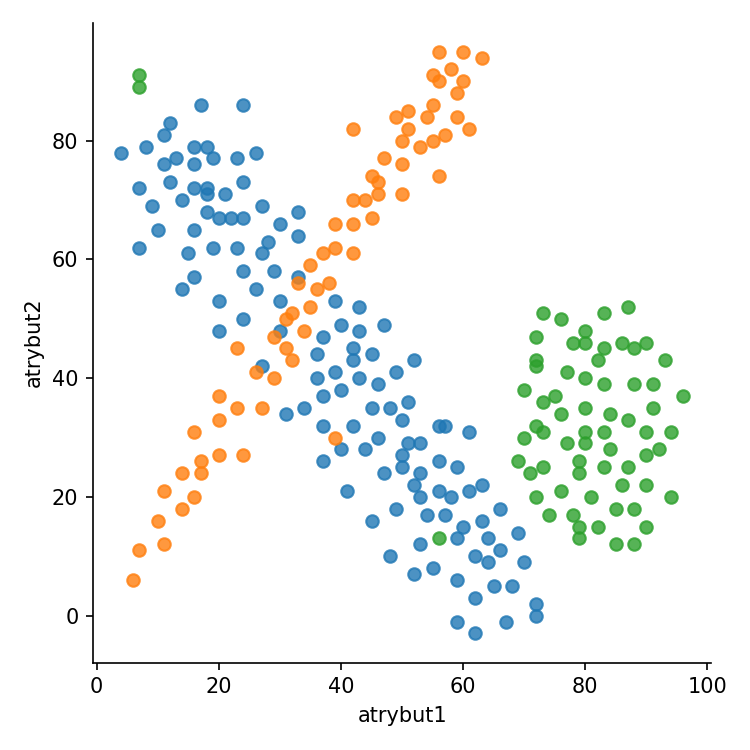

In [37]:
d = pd.read_csv('dane/dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [38]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


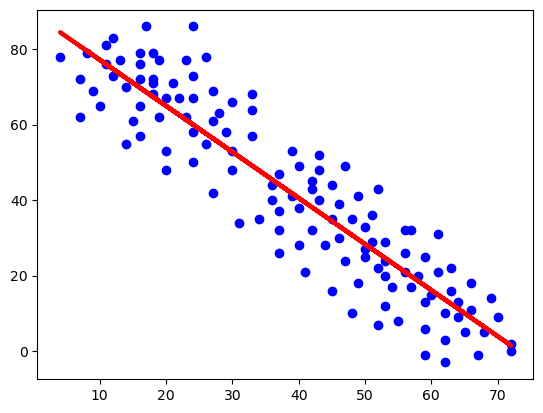

In [39]:
%matplotlib inline
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

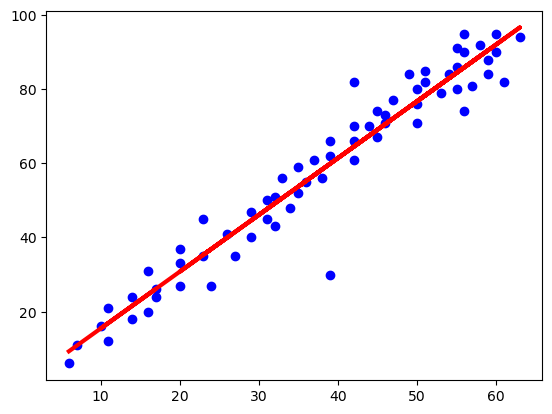

In [45]:
dd = d[d.klasa == 'klasa 2']
x2 = dd.iloc[:,0].values.reshape(-1,1)
y2 = dd.iloc[:,1].values.reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(x2,y2) 
y_pred = regressor.predict(x2)
plt.scatter(x2, y2,  color='blue')
plt.plot(x2, y_pred, color='red', linewidth=3)
plt.show()

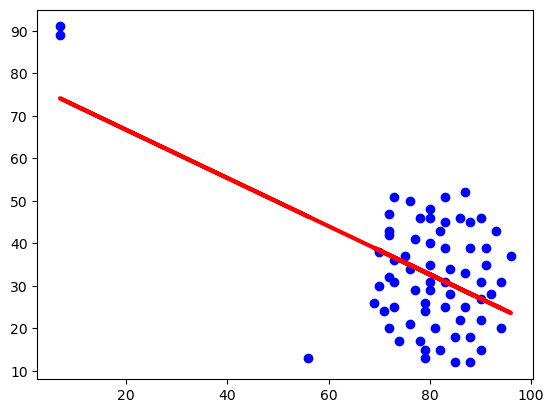

In [44]:
dd = d[d.klasa == 'klasa 1']
x1 = dd.iloc[:,0].values.reshape(-1,1)
y1 = dd.iloc[:,1].values.reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(x1,y1) 
y_pred = regressor.predict(x1)
plt.scatter(x1, y1,  color='blue')
plt.plot(x1, y_pred, color='red', linewidth=3)
plt.show()

Można zauważyć że prosta dopasowała się do punktów najbardziej oddalonych, wynika z tego że regresja liniowa jest wrażliwa na odchylenia

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [42]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

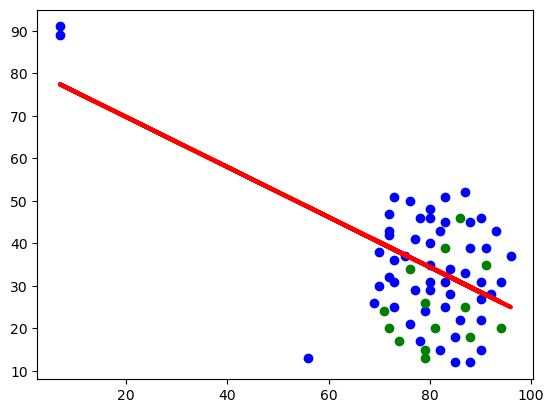

błąd uczenia 143.7605900852357
błąd generalizacji 195.55161262816824


In [43]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele są bardziej, a dla których - mniej stabilne? Dlaczego?

In [58]:
for k in d['klasa'].unique():
    for i in range(1,4):
        print(f'{k} próba {i}')
        dd = d[d.klasa == k]

        x = dd.iloc[:,0].values.reshape(-1,1)
        y = dd.iloc[:,1].values.reshape(-1,1)

        x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
        regressor = LinearRegression()  
        regressor.fit(x_ucz,y_ucz) 
        y_pred_ucz = regressor.predict(x_ucz)
        e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
        y_pred_test = regressor.predict(x_test)
        e_test = metrics.mean_squared_error(y_test, y_pred_test)

        print(f'błąd uczenia {e_ucz}  |  błąd generalizacji {e_test}')

klasa 3 próba 1
błąd uczenia 117.74438392608673  |  błąd generalizacji 33.063579082352526
klasa 3 próba 2
błąd uczenia 99.93213036113795  |  błąd generalizacji 106.36792163429439
klasa 3 próba 3
błąd uczenia 95.59539908650919  |  błąd generalizacji 119.84136631554688
klasa 2 próba 1
błąd uczenia 41.63244168612218  |  błąd generalizacji 37.52277611819982
klasa 2 próba 2
błąd uczenia 25.047016662503548  |  błąd generalizacji 101.8608311809229
klasa 2 próba 3
błąd uczenia 42.98247977621741  |  błąd generalizacji 33.897310509375316
klasa 1 próba 1
błąd uczenia 157.46975060274795  |  błąd generalizacji 145.0444534364505
klasa 1 próba 2
błąd uczenia 131.27805869695464  |  błąd generalizacji 233.79459697297048
klasa 1 próba 3
błąd uczenia 139.9661770650921  |  błąd generalizacji 199.16746921114625


Najbardziej stabilne są modele uzyskane dla klasy 2 ponieważ punkty są wąsko skupione, dla klasy 3 modele są mniej stabilne ponieważ punkty rozkładają się na większej powierzchni. Najmniej stabilne są modele dla klasy 1, ciężko jest wyznaczyć prostą aproksymującą ponieweważ punkty układają się w okrąg oraz wystepują punkty znacznie oddalone

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 20 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


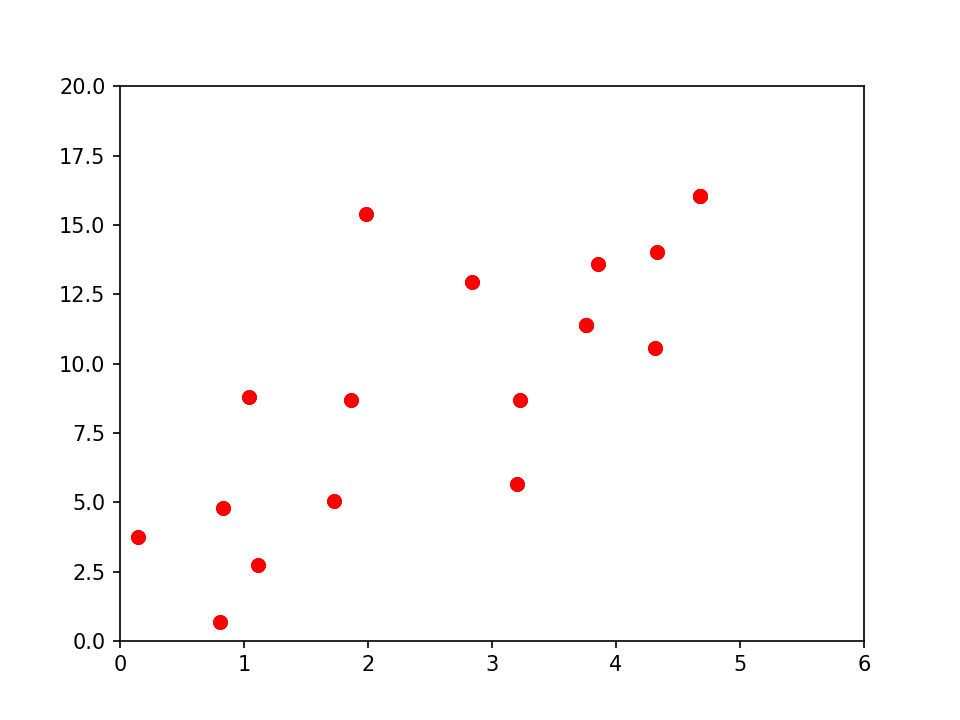

In [66]:
%matplotlib notebook
%matplotlib notebook
ile_probek = 20
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [67]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes
None


,x,y
0,0.141129,3.748196
1,0.806452,0.663781
2,0.830645,4.776335
3,1.108871,2.720058
4,1.036291,8.780664
5,1.725807,5.046897
6,1.979839,15.382395
7,1.858871,8.672439
8,2.838710,12.947330
9,3.201613,5.642136


<IPython.core.display.Javascript object>


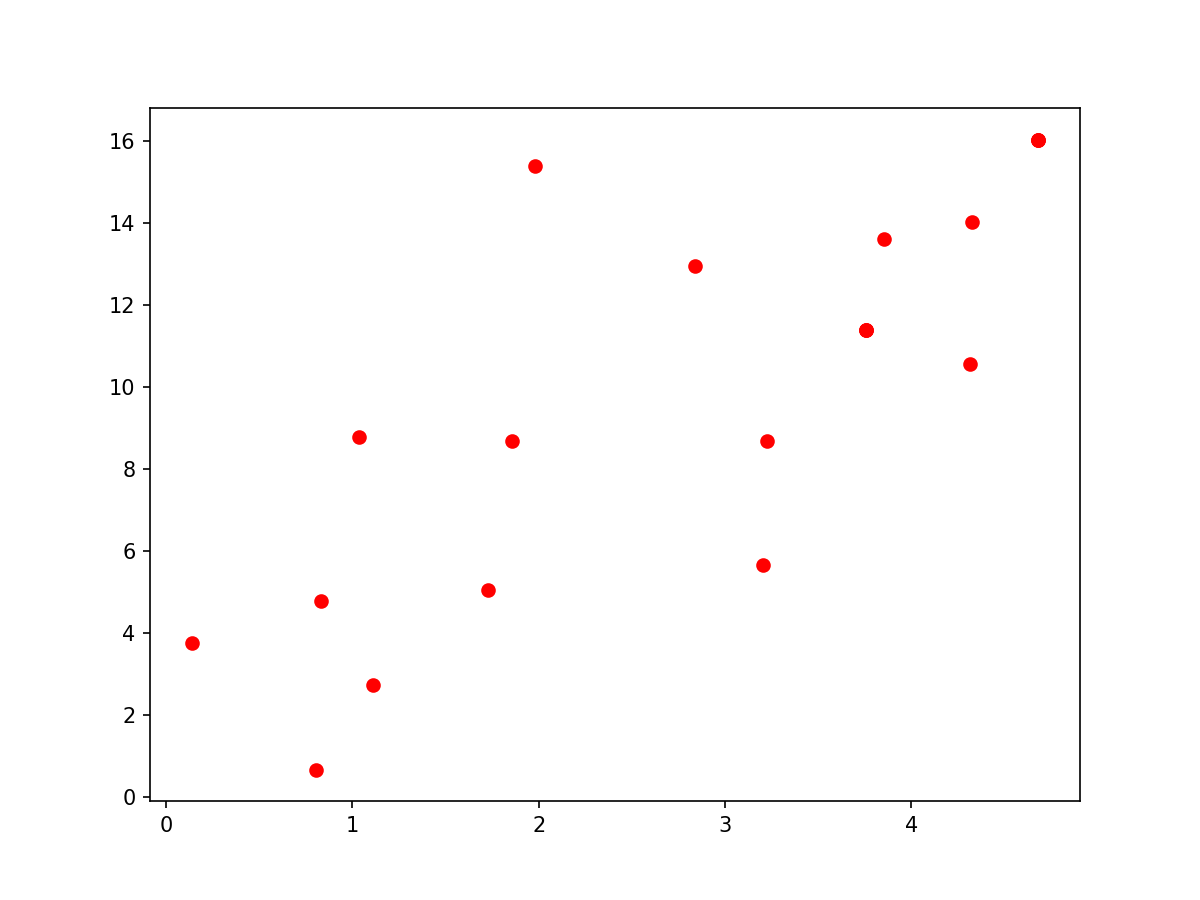

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(df.x, df.y, color='red')
plt.show()

> **Zadanie** Napisz funkcję, która utworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [113]:
def create_X(data, degree):
    X = pd.DataFrame(np.ones((data.shape[0], degree+1)))
    X.iloc[:,1] = data
    if degree > 1:
        for i in range(2,degree+1):
            X.iloc[:,i] = X.iloc[:,1] **i
    
    return X
        

X = create_X2(df.x, 3)
X

,0,1,2,3
0,1.0,0.141129,0.019917,0.002811
1,1.0,0.806452,0.650365,0.524488
2,1.0,0.830645,0.689972,0.573122
3,1.0,1.108871,1.229595,1.363463
4,1.0,1.036291,1.073898,1.112871
5,1.0,1.725807,2.978409,5.140158
6,1.0,1.979839,3.919762,7.760498
7,1.0,1.858871,3.455402,6.423148
8,1.0,2.838710,8.058274,22.875102
9,1.0,3.201613,10.250327,32.817581


> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [126]:
def find_w(data, degree):
    X = create_X(data, degree)
    Y = df.y
    w = np.dot(np.linalg.pinv(X), Y)
    print(f'Współczynniki dla stopnia {degree}: {w}')
    return w

find_w(df.x, 3)

Współczynniki dla stopnia 3: [ 0.40623469  7.53374074 -2.4305121   0.32183154]


array([ 0.32183154, -2.4305121 ,  7.53374074,  0.40623469])

> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


<IPython.core.display.Javascript object>


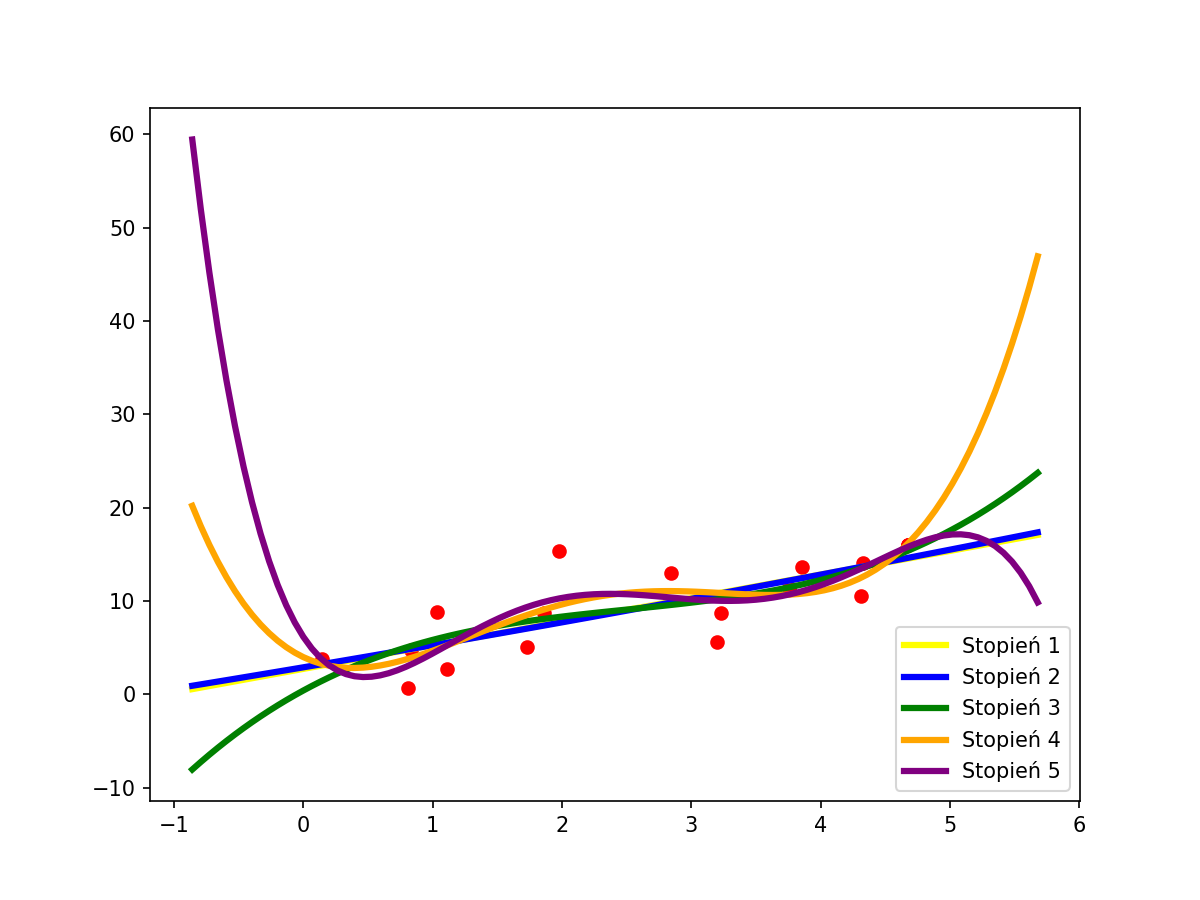

Współczynniki dla stopnia 1: [2.7220442  2.52904568]
Współczynniki dla stopnia 2: [2.89107649 2.33531357 0.03733382]
Współczynniki dla stopnia 3: [ 0.40623469  7.53374074 -2.4305121   0.32183154]
Współczynniki dla stopnia 4: [ 3.98116027 -6.59453261 10.69702852 -3.83610752  0.4211921 ]
Współczynniki dla stopnia 5: [  6.15133413 -21.03949335  31.91942902 -15.57805634   3.15070384
  -0.22520459]


In [147]:
x_min, x_max = min(df.x) - 1, max(df.x) + 1
y_min, y_max = min(df.y) - 1, max(df.y) + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.figure(figsize=(8, 6))
plt.scatter(df.x, df.y, color='red')
x_range = np.linspace(x_min, x_max, 100)
colours = ['yellow', 'blue', 'green', 'orange', 'purple']

for i in range(1, 6):
    w = find_w(df.x, i)
    y_predicted = np.polyval(w[::-1], x_range)
    plt.plot(x_range, y_predicted, label=f'Stopień {i}', color=colours[i-1], linewidth=3)

plt.legend()
plt.show()


<IPython.core.display.Javascript object>


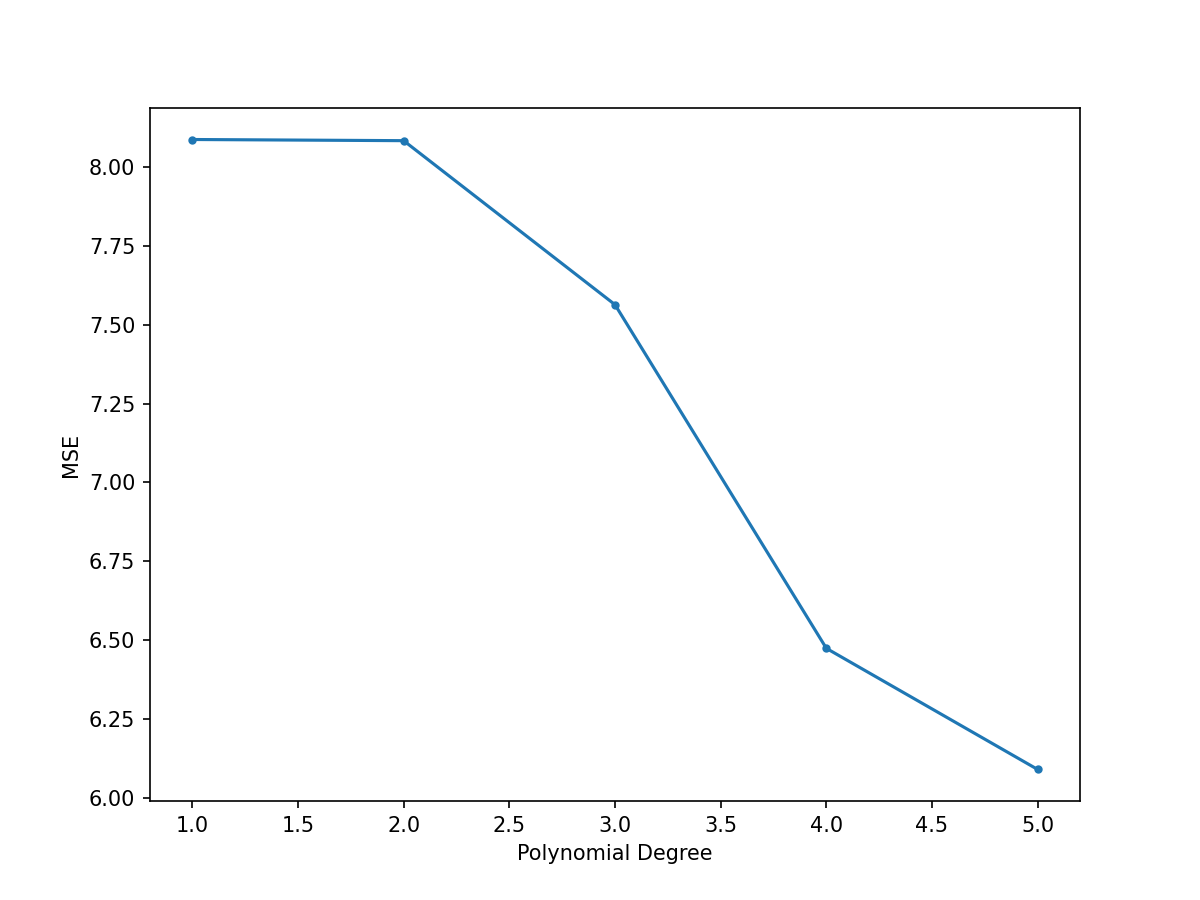

In [195]:
mse_val = []
degrees = [1, 2, 3, 4, 5]

for i in range(1, 6):
    X = create_X(df.x, i)
    w = np.dot(np.linalg.pinv(X), df.y)
    
    y_pred = np.polyval(w[::-1], df.x)
    
    mse = metrics.mean_squared_error(df.y, y_pred)
    mse_val.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_values, marker='.')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.show()


Funkcja jest malejąca

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

numpy.polyfit()

> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

In [158]:
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.2, random_state=2)

In [196]:
x_ucz = x_ucz.sort_index().reset_index(drop = True)
y_ucz = y_ucz.sort_index().reset_index(drop = True)
x_test = x_test.sort_index().reset_index(drop = True)
y_test = y_test.sort_index().reset_index(drop = True)

<IPython.core.display.Javascript object>


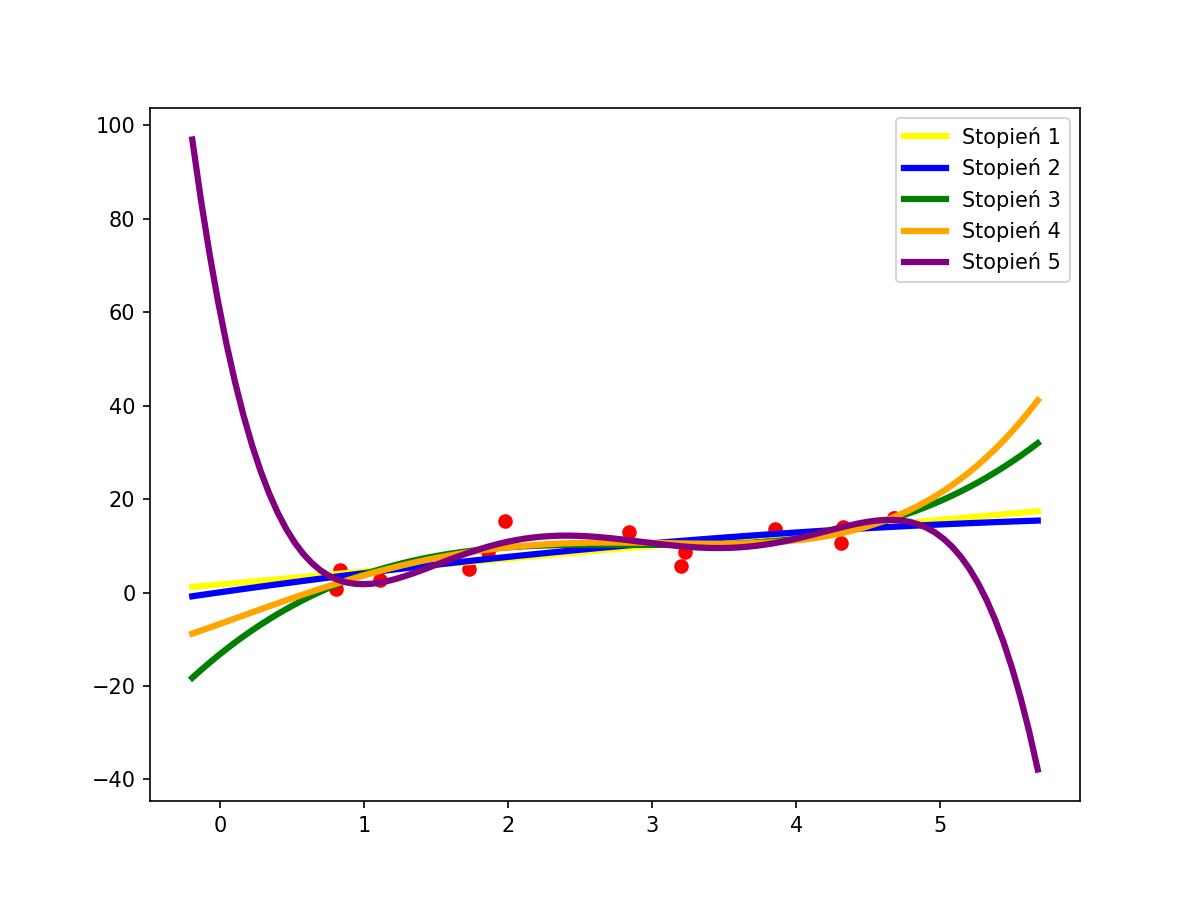

In [194]:
x_min, x_max = min(x_ucz) - 1, max(x_ucz) + 1
y_min, y_max = min(y_ucz) - 1, max(y_ucz) + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.figure(figsize=(8, 6))
plt.scatter(x_ucz, y_ucz, color='red')
x_range = np.linspace(x_min, x_max, 100)
colours = ['yellow', 'blue', 'green', 'orange', 'purple']

for i in range(1, 6):
    X = create_X(x_ucz, i)
    Y = y_ucz
    w = np.dot(np.linalg.pinv(X), Y)
    y_predicted = np.polyval(w[::-1], x_range)
    plt.plot(x_range, y_predicted, label=f'Stopień {i}', color=colours[i-1], linewidth=3)

plt.legend()
plt.show()

In [201]:
def find_mse(x_data, y_data):
    mse_val = []
    
    for i in range(1, 6):
        X = create_X(x_data, i)
        w = np.dot(np.linalg.pinv(X), y_data)

        y_pred = np.polyval(w[::-1], x_data)

        mse = metrics.mean_squared_error(y_data, y_pred)
        mse_val.append(mse)
        
    return mse_val

<IPython.core.display.Javascript object>


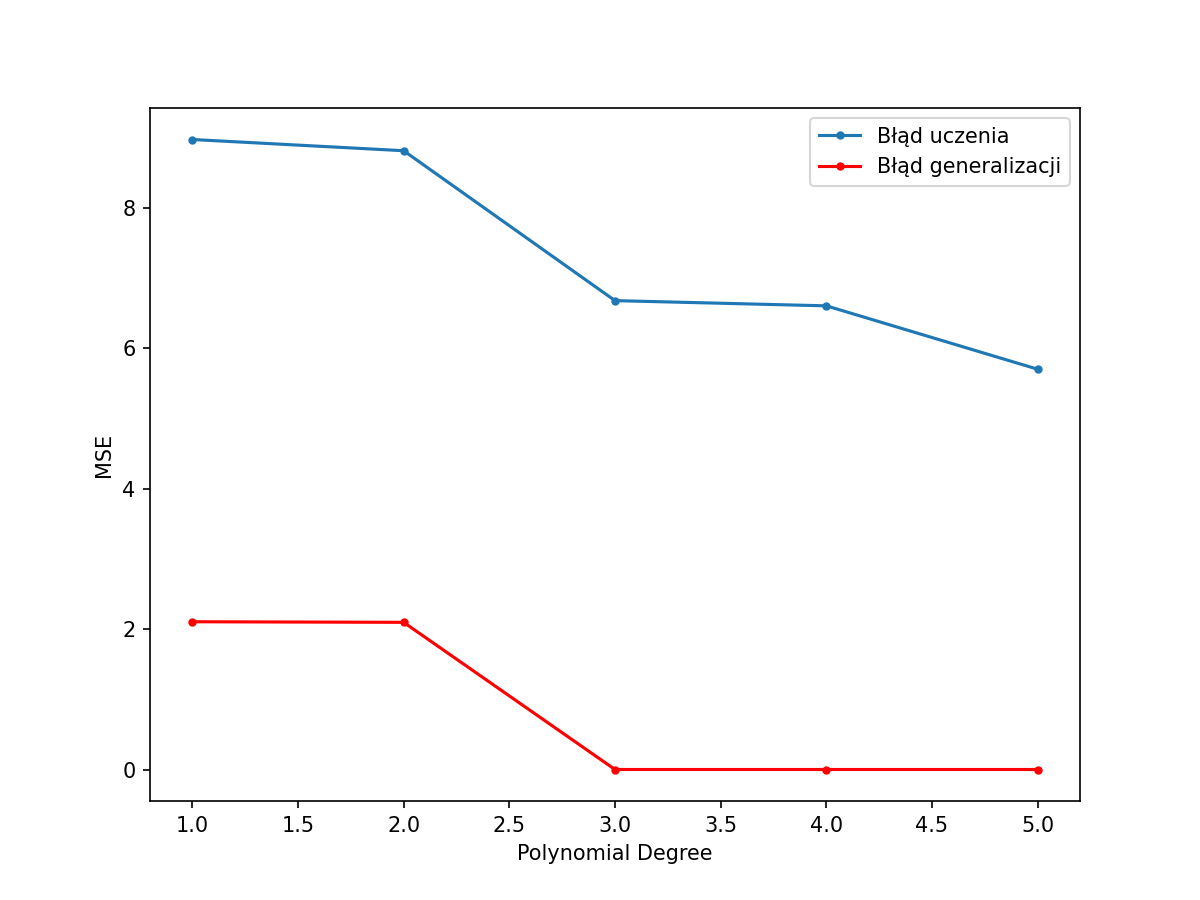

In [206]:
mse_train = find_mse(x_ucz, y_ucz)
mse_test = find_mse(x_test, y_test)
degrees = [1, 2, 3, 4, 5]


plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_train, marker='.', label = 'Błąd uczenia')
plt.plot(degrees, mse_test, marker='.', label = 'Błąd generalizacji', c='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend() 
plt.show()

Najlepiej wybrać wielomian o stopniu większym bądź równym 3 ponieważ wtedy błąd generalizacji jest najmniejszy

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. Jeśli macierz X byłaby macierzą kawdratową to można wyliczyć jej dokładne wartości i błąd będzie równy 0, jednach w większości przydaków jesteśmy w stanie policzyć tylko pseudoodwrotność macierzy i błąd nigdy nie będzie równy 0
2. To zależy, im większy mamy stopień wielomianu tym krzywa jest bardziej dopasowana do punktów ale wyższy stopień wielomianu może doprowadzić do overfittingu
3. Tak, błąd średniokwadratowy jest zawsze macierzą kwadratową czyli ma minimum
4. Im większy stopień wielomianu tym wieksze parametry